# Customer Purchase Behaviour Analysis for Targeted Marketing Strategies

In [1]:
#INTRODUCTION
# In today’s competitive business environment, understanding customer behavior is crucial for designing effective marketing strategies. 
# The project “Customer Behaviour Analysis for Targeted Marketing Strategies” aims to analyze customer purchasing patterns to understand their 
#preferences and buying behaviour.


#It helps businesses predict customer behavior and design better marketing strategies.

In [2]:
#Basic Libraries for Data Handling and Numerical Operations
import numpy as np
import pandas as pd

#Visualization Libraries for Data Exploration and Insights
import matplotlib.pyplot as plt
import seaborn as sns

# for saving/loading model + scaler and alternative saving method
import pickle

#Preprocessing and Data Splitting Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#Machine Learning CLassification Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#Advanced Gradient Boosting Algorithm
from xgboost import XGBClassifier

#Model Evaluation Metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

# Visualizing the Confusion Matrix of all classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#To Ignore Unnecessary Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Dataset
df = pd.read_csv('customer_purchase_data.csv')
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [4]:
#Display first 5 rows
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [5]:
#Check for missing values
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [6]:
#Checking  the datatypes of each column
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [7]:
#Display basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [8]:
#Summary statistics for numeric columns
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [9]:
#Check for duplicate rows
df.duplicated().sum()

np.int64(112)

In [10]:
#Remove duplicates
df = df.drop_duplicates()
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [11]:
df.duplicated().sum()

np.int64(0)

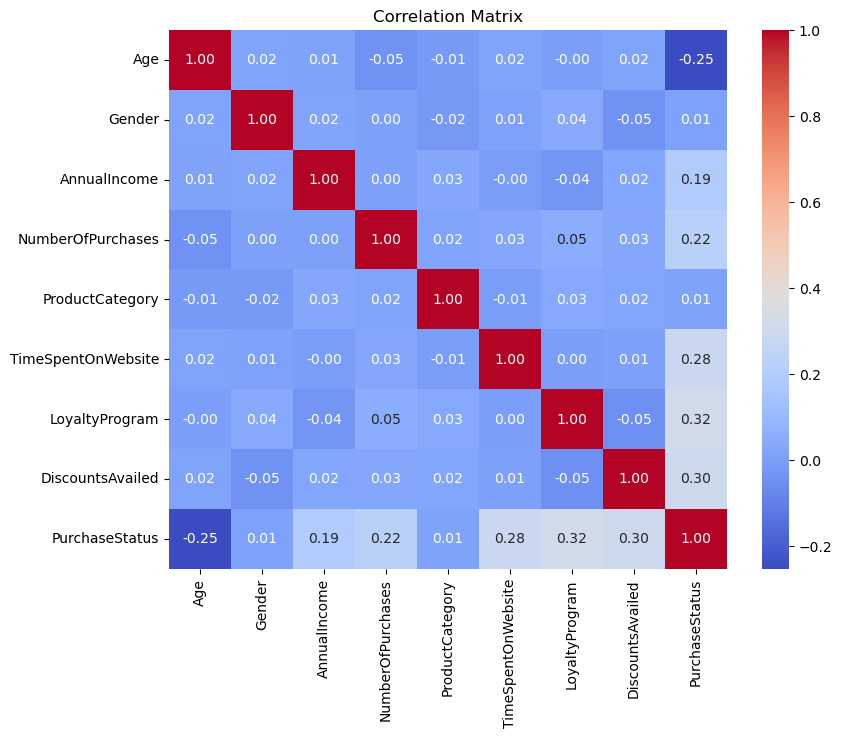

In [12]:
# Correlation heatmap (numerical features)         This calculates correlations between all numerical columns.
plt.figure(figsize=(9,7))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.drop(['ProductCategory'],axis = 1,inplace=True)
df

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,30.568601,0,5,1
1,20,1,23579.773583,4,38.240097,0,5,0
2,27,1,127821.306432,11,31.633212,1,0,1
3,24,1,137798.623120,19,46.167059,0,4,1
4,31,1,99300.964220,19,19.823592,0,0,1
...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,34.590743,0,5,1
1496,67,1,28775.331069,18,17.625707,0,1,1
1497,40,1,57363.247541,7,12.206033,0,0,0
1498,63,0,134021.775532,16,37.311634,1,0,1


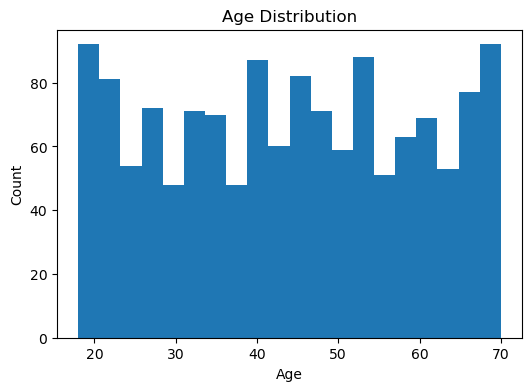

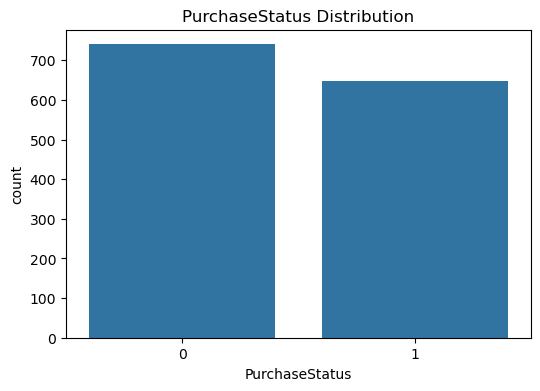

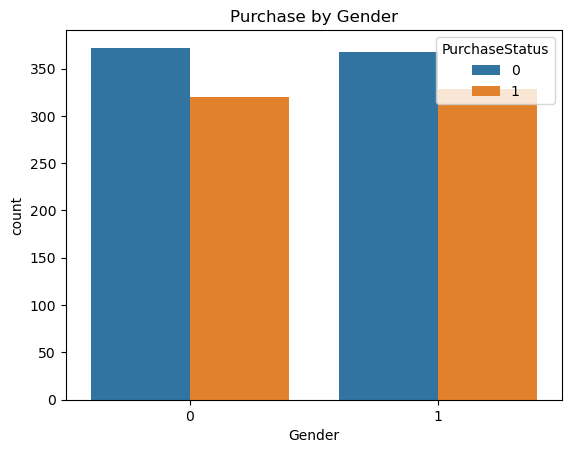

In [14]:
#EDA Plots (Age distribution, counts, boxplots, correlations)

# Age distribution

# This creates a histogram of the Age column.
# It shows how customers are spread across different age groups.
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age'); plt.ylabel('Count')
plt.show()

# Purchase status counts
# This shows a bar chart of how many people purchased (1) vs did not purchase (0).
# It helps us understand the balance of the target variable — for example, if most customers bought or not.
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=df)
plt.title('PurchaseStatus Distribution')
plt.show()

# Gender vs PurchaseStatus (if Gender encoded 0/1, map for readability)
# This compares gender with purchase status.
# This helps to see which gender purchased more frequently.

if df['Gender'].dtype != 'object':
    temp = df.copy()
    # If 0/1 mapping known, you can map, otherwise plot as is
    sns.countplot(x='Gender', hue='PurchaseStatus', data=temp)
    plt.title('Purchase by Gender')
    plt.show()
    



In [15]:
#Splitting the dataset into Features (X) and Target (y).
X = df.iloc[:,:-1]     #All columns except last one
X

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,30.568601,0,5
1,20,1,23579.773583,4,38.240097,0,5
2,27,1,127821.306432,11,31.633212,1,0
3,24,1,137798.623120,19,46.167059,0,4
4,31,1,99300.964220,19,19.823592,0,0
...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,34.590743,0,5
1496,67,1,28775.331069,18,17.625707,0,1
1497,40,1,57363.247541,7,12.206033,0,0
1498,63,0,134021.775532,16,37.311634,1,0


In [16]:
#The last column is the target variable
y = df.iloc[:,-1].values   
y

array([1, 0, 1, ..., 0, 1, 1])

In [17]:
# Feature scaling using MinMaxScaler   this is done for features comparable on the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.42307692, 1.        , 0.355351  , ..., 0.50092507, 0.        ,
        1.        ],
       [0.03846154, 1.        , 0.02757097, ..., 0.63105169, 0.        ,
        1.        ],
       [0.17307692, 1.        , 0.83076553, ..., 0.51898337, 1.        ,
        0.        ],
       ...,
       [0.42307692, 1.        , 0.28787702, ..., 0.1894527 , 0.        ,
        0.        ],
       [0.86538462, 0.        , 0.87854095, ..., 0.61530278, 1.        ,
        0.        ],
       [0.61538462, 0.        , 0.25137334, ..., 0.41237167, 1.        ,
        0.8       ]])

In [18]:
#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test, = train_test_split(X_scaled,y,test_size =0.3, random_state=1)

In [19]:
#Check the shape of the training and testing sets
X_train.shape,y_train.shape

((971, 7), (971,))

In [20]:
X_test.shape,y_test.shape

((417, 7), (417,))

In [21]:
#Training and evaluating multiple classification models
#Initialize all models
knn = KNeighborsClassifier()
sv = SVC()
dt = DecisionTreeClassifier()
nb = GaussianNB()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()
gd = GradientBoostingClassifier()
bst = XGBClassifier() 
#Dictionery to store model names and objects
models = {
    "K-Nearest Neighbors":knn,
    "Suport Vector Classifier":sv,
    "Decision Tree Classifier":dt,
    "Naive Bayes":nb,
    "Random Forest":rf,
    "AdaBoost":ad,
    "Gradient Boosting":gd,
    "XGBoost":bst
}

In [22]:
#Training and evaluating all models
for name, models in models.items():
    models.fit(X_train,y_train)
    y_pred = models.predict(X_test)
    print(f"\n********************{name}********************")
    print("Classification Report:\n",classification_report(y_test,y_pred,digits = 3))
    print("Accuracy:",round(accuracy_score(y_test,y_pred), 3))


********************K-Nearest Neighbors********************
Classification Report:
               precision    recall  f1-score   support

           0      0.854     0.843     0.848       216
           1      0.833     0.846     0.840       201

    accuracy                          0.844       417
   macro avg      0.844     0.844     0.844       417
weighted avg      0.844     0.844     0.844       417

Accuracy: 0.844

********************Suport Vector Classifier********************
Classification Report:
               precision    recall  f1-score   support

           0      0.853     0.884     0.868       216
           1      0.870     0.836     0.853       201

    accuracy                          0.861       417
   macro avg      0.862     0.860     0.860       417
weighted avg      0.861     0.861     0.861       417

Accuracy: 0.861

********************Decision Tree Classifier********************
Classification Report:
               precision    recall  f1-score   sup

In [23]:
# Final Result Summary
# Among all the classifiers tested, AdaBoost achieved the highest accuracy (94%),followed closely by Random Forest and Gradient Boosting (92.6% each).
# This indicates that ensemble learning methods performed best for this dataset.Therefore, AdaBoost can be considered the most effective model
# for predicting customer purchase behavior in this project.

K-Nearest Neighbors Accuracy:0.84


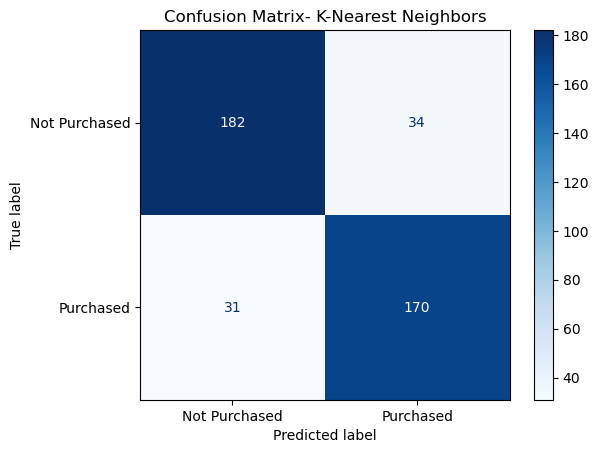

Suport Vector Classifier Accuracy:0.86


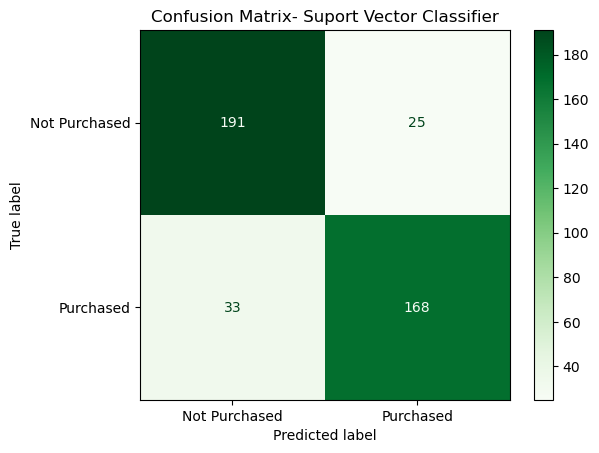

Decision Tree Classifier Accuracy:0.88


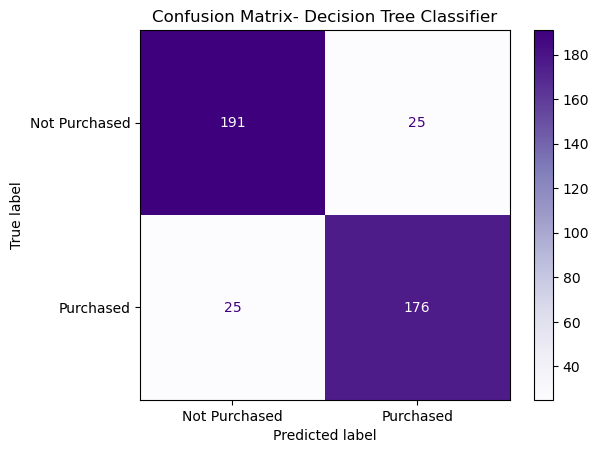

Naive Bayes Accuracy:0.85


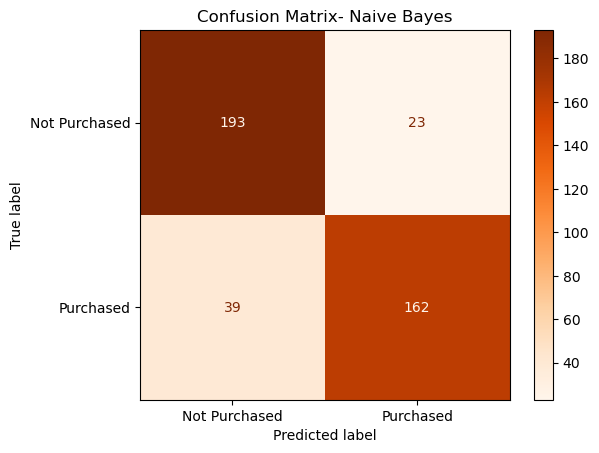

Random Forest Accuracy:0.94


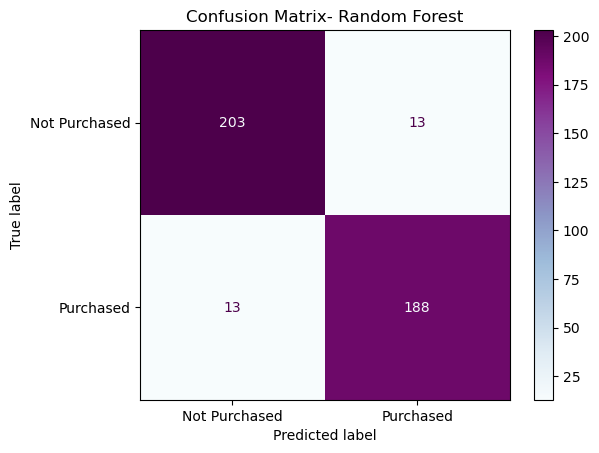

AdaBoost Accuracy:0.94


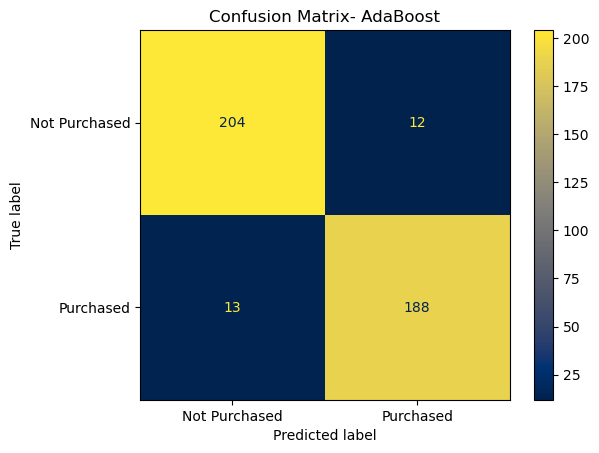

Gradient Boosting Accuracy:0.93


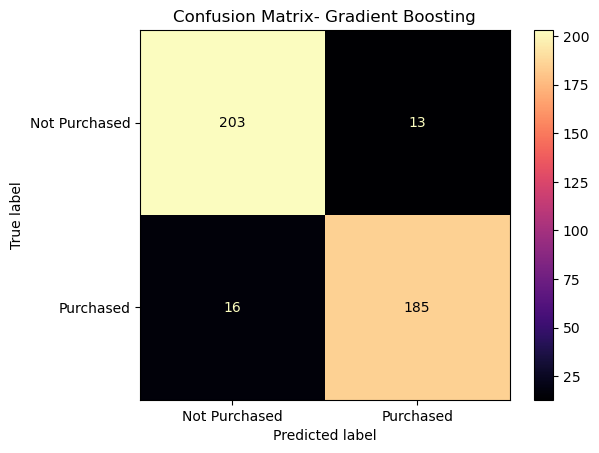

XGBoost Accuracy:0.89


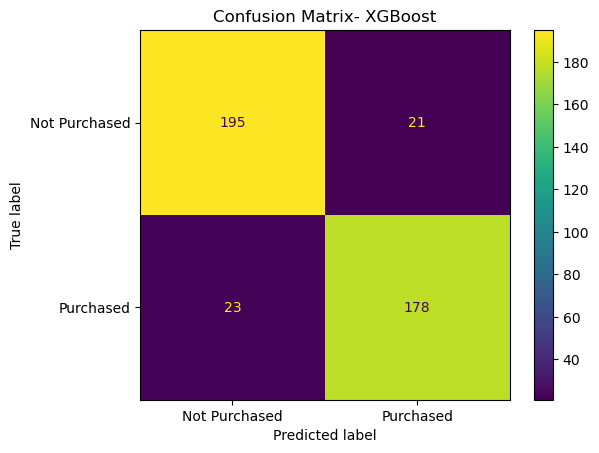

In [24]:
# from sklearn.metrics import confusion_matrics, ConfusionMatricsDisplay,accuracy_score
# The purpose of creating a confusion matrix is to measure how well the model predicts correctly and incorrectly by showing the counts of true and false
# predictions for each class.
models = {
    "K-Nearest Neighbors":knn,
    "Suport Vector Classifier":sv,
    "Decision Tree Classifier":dt,
    "Naive Bayes":nb,
    "Random Forest":rf,
    "AdaBoost":ad,
    "Gradient Boosting":gd,
    "XGBoost":bst
}
colors = ["Blues","Greens","Purples","Oranges","BuPu","cividis","magma","viridis"]
for (name, model),cmap in zip(models.items(),colors):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Accuracy:{accuracy_score(y_test,y_pred):.2f}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Purchased","Purchased"])
    disp.plot(cmap=cmap)
    plt.title(f"Confusion Matrix- {name}")
    plt.show()

In [25]:
pickle.dump(ad,open('ad_model.sav','wb'))

In [26]:
pickle.dump(ad,open('Scaler.sav','wb'))

In [27]:
!pip list

Package                           Version
--------------------------------- -------------------
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.16.2
altair                            5.5.0
anaconda-anon-usage               0.7.1
anaconda-auth                     0.8.6
anacond